<a href="https://colab.research.google.com/github/hutashani-s/codsoft/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

Dataset: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

Model: Logistic Regression, Random Forest Classification, Gradient Boosting

**Customer churn** is the rate at which customers stop doing business with a company or service, in the case of the dataset, the service is a bank.

*Logistic Regression* is a statistical model used for binary classification problems, where the outcome variable is categorical. It predicts the probability of an instance belonging to a particular class.

*Random Forest* is an ensemble learning method that combines multiple decision trees to make predictions. It's used for both classification and regression tasks.

*Gradient Boosting* is another ensemble learning method that builds a strong predictive model by combining multiple weak learners (typically decision trees).

## Importing Dependencies

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
#used to build a uniformly distributed target class in case of unbalanced data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #for classification
from sklearn.ensemble import GradientBoostingRegressor  #for regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Importing Dataset

In [2]:
import kagglehub
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 68.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1


In [14]:
data = pd.read_csv(path + "/Churn_Modelling.csv")
data.shape

(10000, 14)

In [15]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Dropping unnecessary columns

In [17]:
data = data.drop(columns = ['RowNumber', 'CustomerId'], axis=1)

In [19]:
data.head(2)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


### Observing Unique Values in all Columns

In [22]:
for col in data.columns:
  print(col, data[col].unique)
  print("."*10)

Surname <bound method Series.unique of 0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object>
..........
CreditScore <bound method Series.unique of 0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64>
..........
Geography <bound method Series.unique of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>
..........
Gender <bound method Series.unique of 0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Fe

### Checking for null values

In [23]:
data.isnull().sum()

,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


### Checking Distribution of Exited Column

In [26]:
print(data['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


### Analysing Numerical Features

In [27]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [30]:
def col_distribution(data, column_name):
  #histogram
  plt.figure(figsize=(5,3))
  sns.histplot(data[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  #adding mean and median lines
  col_mean =  data[column_name].mean()
  col_median = data[column_name].median()
  plt.axvline(col_mean, color='red', linestyle='-', label='Mean')
  plt.axvline(col_median, color='blue', linestyle='--', label='Median')

  plt.legend()
  plt.show()

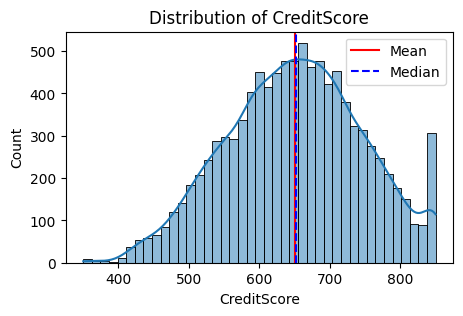

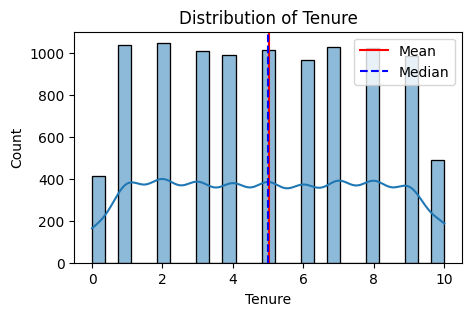

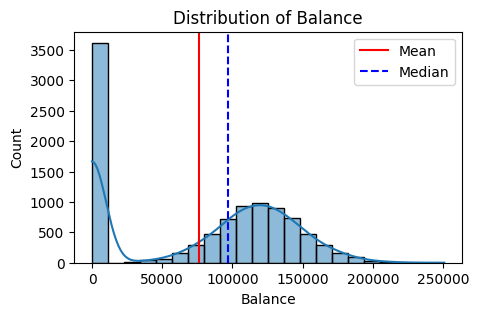

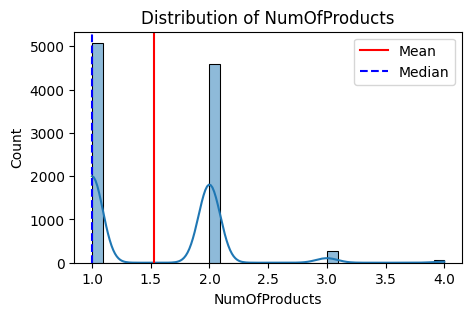

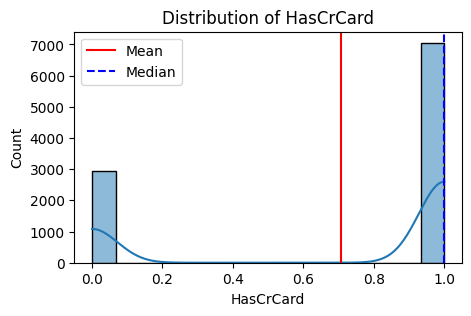

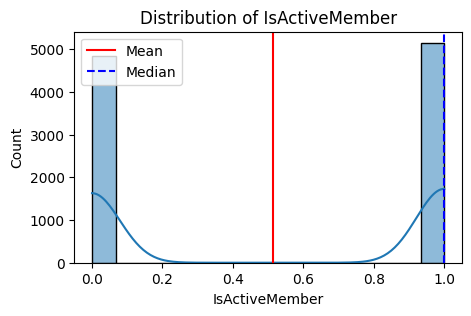

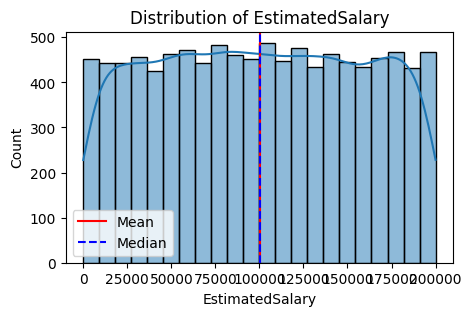

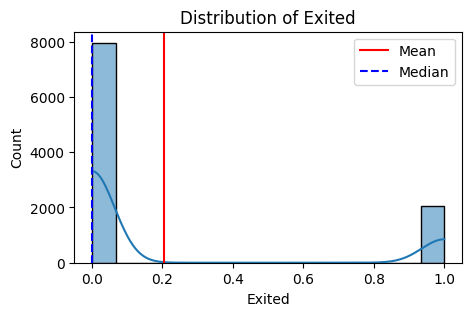

In [32]:
vis_cols = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',	'EstimatedSalary', 'Exited']
for col in vis_cols:
  col_distribution(data, col)
  print('\n')

In [33]:
#boxplot to identify outliers
def col_boxplot(data, column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(data[column_name])
  plt.title(f"Distribution of {column_name}")
  plt.show()

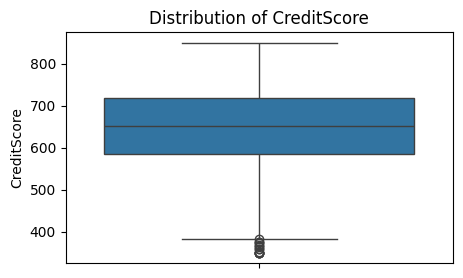

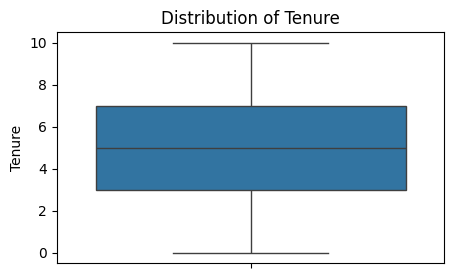

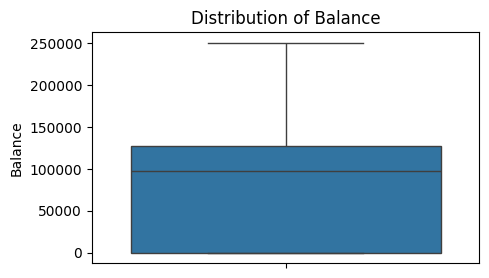

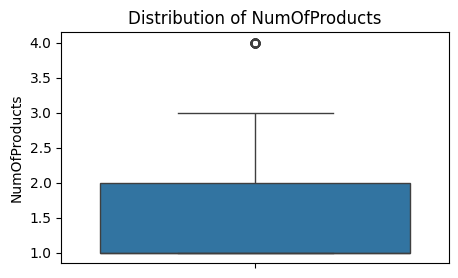

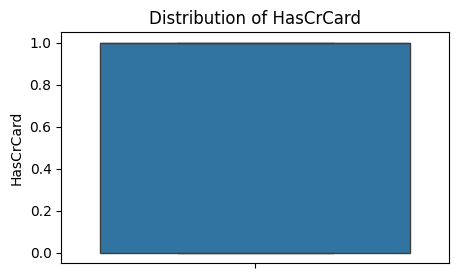

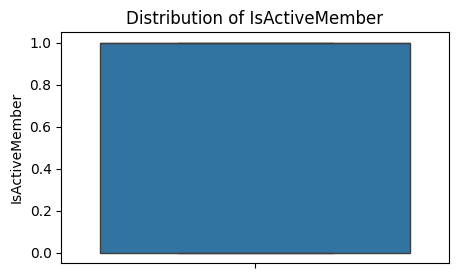

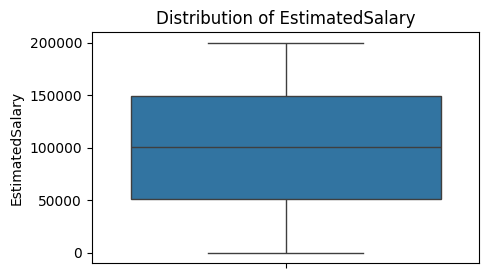

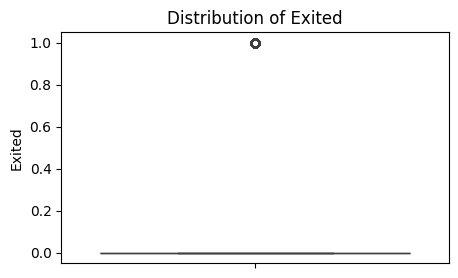

In [34]:
for col in vis_cols:
  col_boxplot(data, col)
  print('\n')

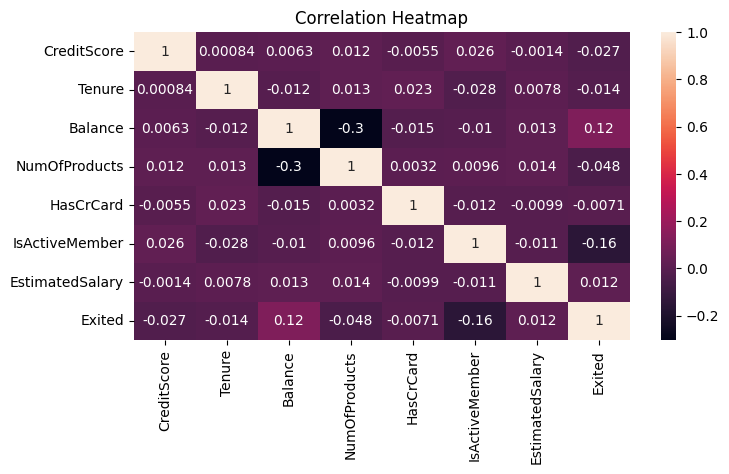

In [36]:
#corelation heatmap for multi-colinearity issues
plt.figure(figsize=(8,4))
sns.heatmap(data[['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

#its safe to remove columns that show high correlation
#since all columns aren't highly correlated, they will all be tired for modelling

## Data Preprocessing

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


### Label Encoding Categorical Features

In [38]:
#label encoding of cat features:  Geography, Gender
cat_cols = ['Geography', 'Gender']

#initializing dictionary to save encoders
encoders = {}

#applying label encoding
for col in cat_cols:
  label_encoder = LabelEncoder()
  data[col] = label_encoder.fit_transform(data[col])
  encoders[col] = label_encoder

In [39]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Train Test Split

In [41]:
#splitting target and features
x = data.drop(columns=['Exited', 'Surname'])
y = data['Exited']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

### SMOTE

In [44]:
print(y_train.value_counts())

Exited
0    5577
1    1423
Name: count, dtype: int64


In [45]:
smote = SMOTE(random_state=32)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [46]:
print(y_train_resampled.value_counts())

Exited
1    5577
0    5577
Name: count, dtype: int64


## Model Training

In [60]:
#dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [61]:
#dictionary to store cross validation scores
cv_scores = {}

#perform cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name}...")
  scores = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
  cv_scores[model_name] = scores
  print(f"{model_name} CV Score Accuracy: {scores.mean()}")

Training Logistic Regression...
Logistic Regression CV Score Accuracy: 0.7705793416453439
Training Random Forest...
Random Forest CV Score Accuracy: 0.8578120772723526
Training Gradient Boosting...
Gradient Boosting CV Score Accuracy: 0.8350388834060617


In [67]:
cv_scores

{'Logistic Regression': array([0.66382788, 0.77319588, 0.80053788, 0.80277902, 0.81255605]),
 'Random Forest': array([0.75257732, 0.85925594, 0.89018377, 0.89332138, 0.89372197]),
 'Gradient Boosting': array([0.74137158, 0.84222322, 0.86463469, 0.86822053, 0.85874439])}

## Testing Data

In [64]:
rfc = RandomForestClassifier()
model.fit(x_train_resampled, y_train_resampled)
y_pred = model.predict(x_test)

## Evaluation Metrics

In [66]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score:  0.8093333333333333

Confusion Matrix:
 [[2010  376]
 [ 196  418]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88      2386
           1       0.53      0.68      0.59       614

    accuracy                           0.81      3000
   macro avg       0.72      0.76      0.73      3000
weighted avg       0.83      0.81      0.82      3000

